In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import describe, skew, kurtosis, kstest, norm
from scipy import stats

sns.set_style('darkgrid')
warnings.filterwarnings('ignore')


data_location = "/Users/SoapyGenie/Documents/Datosejercicoevaluacionalturaspython.xlsx"

xl_file = pd.ExcelFile(data_location)
#dfs = {sheet_name: xl_file.parse(sheet_name) for sheet_name in xl_file.sheet_names}
    
fs = pd.read_excel(data_location, sheet_name="Hoja1")

#print(fs)
# Assuming that the column names in your Excel file are 'predinástico' and 'altura_craneos_mm'
# You can adjust the column names as needed.

data_matrix = fs[['Época histórica', 'Altura del cráneo']].to_numpy()
data_epoca_1 = fs[fs['Época histórica'] == 1]['Altura del cráneo'].to_numpy()
data_epoca_2 = fs[fs['Época histórica'] == 2]['Altura del cráneo'].to_numpy()
pandas_data_epoca_1 = pd.Series(data_epoca_1)
pandas_data_epoca_2 = pd.Series(data_epoca_2)

print("Medidas de craneos epoca 1 = ", data_epoca_1)
print("Medidas de craneos epoca 2 = ", data_epoca_2)


Medidas de craneos epoca 1 =  [135 137 134 135 136 134 135 134 136 135 134 134 135 135 134 134 135 134
 135 134 134 132 134 135 135 132 134 133 135 133]
Medidas de craneos epoca 2 =  [134 134 133 135 131 133 133 134 134 134 132 132 133 133 132 132 133 131
 131 132 132 133 133 133 133 134 134 134 133 132]


In [3]:
#Calculos de cráneos del predinástico temprano
cantidad_muestra_epoca_1 = data_epoca_1.size
media_epoca_1 = np.mean(data_epoca_1)
moda_epoca_1 = np.argmax(np.bincount(data_epoca_1))
mediana_epoca_1 = np.median(data_epoca_1)
varianza_epoca_1 = np.var(data_epoca_1, ddof=1)#el ddof es para decir si es muestra (1) o poblacional (0)
desv_esta_epoca_1 = np.std(data_epoca_1, ddof=1)
rango_epoca_1 = np.ptp(data_epoca_1)
# Calcular el coeficiente de variación de Pearson
pearson_epoca_1 = (desv_esta_epoca_1 / media_epoca_1) * 100

# Asimetría y curtosis
skewness_epoca_1 = pandas_data_epoca_1.skew()
kurt_epoca_1 = pandas_data_epoca_1.kurtosis()

print("\nCálculos de cráneos del predinástico temprano:\n")
print("Medidas de centralización y dispersión:")
print("Cantidad de muestras:", cantidad_muestra_epoca_1)
print("Media:               ", media_epoca_1)
print("Mediana:             ", mediana_epoca_1)
print("Moda:                ", moda_epoca_1)
print("Rango:               ", rango_epoca_1)
print("Varianza:            ", varianza_epoca_1)
print("Desviación estándar: ", desv_esta_epoca_1)
print("Pearson:             ", pearson_epoca_1)

print("\nAsimetría:           ", skewness_epoca_1)
print("Curtosis:            ", kurt_epoca_1)

alpha = 0.05
dis_nom_epoca_1 = norm(media_epoca_1, desv_esta_epoca_1)
ks_statistic_1, p_value_1 = kstest(data_epoca_1, dis_nom_epoca_1.cdf)

print("\nKolmogorov-Smirnov:  ", ks_statistic_1)
print("P value:             ", p_value_1)

if p_value_1 < alpha:
    print("\nLa submuestra de Época 1 no sigue una distribución normal.")
else:
    print("\nLa submuestra de Época 1 sigue una distribución normal.")


Cálculos de cráneos del predinástico temprano:

Medidas de centralización y dispersión:
Cantidad de muestras: 30
Media:                134.4
Mediana:              134.0
Moda:                 134
Rango:                5
Varianza:             1.1448275862068964
Desviación estándar:  1.069966161243848
Pearson:              0.7961057747350059

Asimetría:            -0.1737311042975376
Curtosis:             1.0183245892347403

Kolmogorov-Smirnov:   0.22092700693518066
P value:              0.0911953408223295

La submuestra de Época 1 sigue una distribución normal.


In [9]:
#Calculos de cráneos del predinástico tardio
cantidad_muestra_epoca_2 = data_epoca_2.size
media_epoca_2 = np.mean(data_epoca_2)
moda_epoca_2 = np.argmax(np.bincount(data_epoca_2))
mediana_epoca_2 = np.median(data_epoca_2)
varianza_epoca_2 = np.var(data_epoca_2, ddof=1)#el ddof es para decir si es muestra (1) o poblacional (0)
desv_esta_epoca_2 = np.std(data_epoca_2, ddof=1)
rango_epoca_2 = np.ptp(data_epoca_2)
# Calcular el coeficiente de variación de Pearson
pearson_epoca_2 = (desv_esta_epoca_2 / media_epoca_2) * 100

# Asimetría y curtosis
skewness_epoca_2 = pandas_data_epoca_2.skew()
kurt_epoca_2 = pandas_data_epoca_2.kurtosis()

print("\nCálculos de cráneos del predinástico tardio:\n")
print("Medidas de centralización y dispersión:")
print("Cantidad de muestras:", cantidad_muestra_epoca_2)
print("Media:               ", media_epoca_2)
print("Mediana:             ", mediana_epoca_2)
print("Moda:                ", moda_epoca_2)
print("Rango:               ", rango_epoca_2)
print("Varianza:            ", varianza_epoca_2)
print("Desviación estándar: ", desv_esta_epoca_2)
print("Pearson:             ", pearson_epoca_2)

print("\nAsimetría:           ", skewness_epoca_2)
print("Curtosis:            ", kurt_epoca_2)

alpha = 0.05
dis_nom_epoca_2 = norm(media_epoca_2, desv_esta_epoca_2)
ks_statistic_2, p_value_2 = kstest(data_epoca_2, dis_nom_epoca_2.cdf)





print("\nKolmogorov-Smirnov:  ", ks_statistic_2)
print("P value:             ", p_value_2)

if p_value_2 < alpha:
    print("\nLa submuestra de Época 1 no sigue una distribución normal.")
else:
    print("\nLa submuestra de Época 1 sigue una distribución normal.")


Cálculos de cráneos del predinástico tardio:

Medidas de centralización y dispersión:
Cantidad de muestras: 30
Media:                132.9
Mediana:              133.0
Moda:                 133
Rango:                4
Varianza:             1.0586206896551722
Desviación estándar:  1.0288929437289247
Pearson:              0.7741858116846687

Asimetría:            -0.19537866713306773
Curtosis:             -0.5040834924441051

Kolmogorov-Smirnov:   0.20537964324634056
P value:              0.13789840451236535

La submuestra de Época 1 sigue una distribución normal.


Text(0.5, 0, 'Periodo')

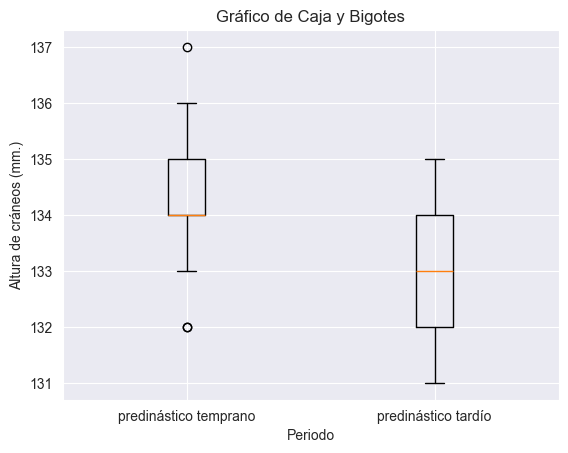

In [5]:
estadisticas = {
    'Medida': ["predinástico temprano", "predinástico tardío"],
    'Valor': [data_epoca_1, data_epoca_2]
}

df_estadisticas = pd.DataFrame(estadisticas)

# Gráfico de caja y bigotes
plt.boxplot(df_estadisticas['Valor'], vert=True)
plt.title('Gráfico de Caja y Bigotes')
plt.xticks([1, 2], ["predinástico temprano", "predinástico tardío"])
plt.ylabel('Altura de cráneos (mm.)')
plt.xlabel('Periodo')

In [6]:
# Calcula la diferencia de las dos muestras
diferencia = data_epoca_1 - data_epoca_2

# Calcula el intervalo de confianza para la diferencia
intervalo_confianza_90 = stats.t.interval(0.90, len(diferencia) - 1, loc=np.mean(diferencia), scale=stats.sem(diferencia))
intervalo_confianza_95 = stats.t.interval(0.95, len(diferencia) - 1, loc=np.mean(diferencia), scale=stats.sem(diferencia))
intervalo_confianza_99 = stats.t.interval(0.99, len(diferencia) - 1, loc=np.mean(diferencia), scale=stats.sem(diferencia))

print("Intervalo de confianza 90: ", intervalo_confianza_90)
print("Intervalo de confianza 95: ", intervalo_confianza_95)
print("Intervalo de confianza 99: ", intervalo_confianza_99)

Intervalo de confianza 90:  (1.0556504911779496, 1.9443495088220502)
Intervalo de confianza 95:  (0.9651389962502914, 2.0348610037497084)
Intervalo de confianza 99:  (0.7791600019930647, 2.2208399980069355)


In [7]:
# Interpretación
if 0 not in intervalo_confianza_90 and 0 not in intervalo_confianza_95 and 0 not in intervalo_confianza_99:
    print("Las alturas de la cabeza son estadísticamente diferentes en ambas épocas.")
    if media_epoca_1 > media_epoca_2:
        print("En la época 1, las cabezas eran más altas que en la época 2.")
    else:
        print("En la época 2, las cabezas eran más altas que en la época 1.")
else:
    print("No hay evidencia estadística de que las alturas de la cabeza sean diferentes en ambas épocas.")

Las alturas de la cabeza son estadísticamente diferentes en ambas épocas.
En la época 1, las cabezas eran más altas que en la época 2.


In [8]:
# Realizar la prueba t de dos muestras
t_statistic, p_value = stats.ttest_ind(data_epoca_1, data_epoca_2)

print("t estadistica: ", t_statistic)
print("p valor: ", p_value)

# Nivel de significancia (alfa)
alfa = 0.05

# Comparar el valor p con alfa
if p_value < alfa:
    print("Se rechaza la hipótesis nula: las medias son estadísticamente diferentes.")
else:
    print("No se puede rechazar la hipótesis nula: las medias son estadísticamente iguales.")

t estadistica:  5.53478118961368
p valor:  7.857638259879935e-07
Se rechaza la hipótesis nula: las medias son estadísticamente diferentes.
